In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [6]:
import nawrapper as nw
import pymaster as nmt
import numpy as np
import matplotlib.pyplot as plt
from pixell import enmap, enplot

def eshow(m, **kwargs): 
    pl=enplot.plot(m,downgrade=8,ticks=5, **kwargs)
    enplot.show(pl)

## Base the WCS/Shape On Apodization
To try and match what was done by Amanda/DW/Steve, I'll restrict the map to the apodized mask shape.

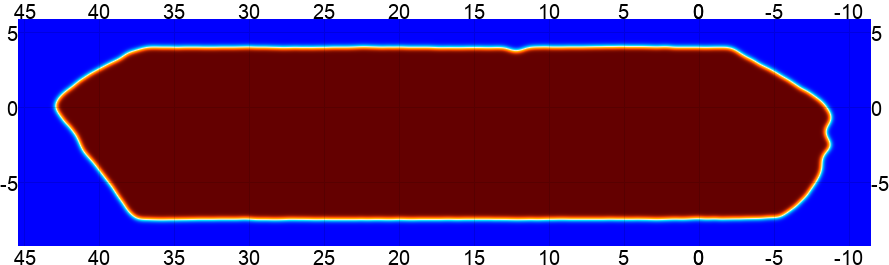

In [15]:
data_root = '/tigress/zequnl/cmb/data/steve_vs_amandadw/steve_sim0'
apopath = f'{data_root}/mask_s14&15_deep56_apod.fits'
steve_apo = enmap.read_map(apopath)
box_shape, box_wcs = steve_apo.shape, steve_apo.wcs

eshow(steve_apo)

In [ ]:
mapname_head = f"{data_root}/maps/ACTPol_148_D56_pa1_f150_s14_4way_split"
mask_file =  f"{data_root}/window/deep56_s14_pa1_f150_c7v5_car_190220_rect_w0_cl0.00nK_pt1.00_nt0.0_T.fits"
mask_pol_file =  f"{data_root}/window/deep56_s14_pa1_f150_c7v5_car_190220_rect_w0_cl0.00nK_pt1.00_nt0.0.fits"
beam_filename = f"{data_root}/beam/beam_tform_160201_s14_pa1_f150_jitter_CMB_deep56.txt"

# loop over splits and generate 
nsplits = 4
namap_list = [nw.namap_car(
    maps=(enmap.read_map(f"{mapname_head}{i}_srcadd_I.fits"), 
          enmap.read_map(f"{mapname_head}{i}_Q.fits"),
          enmap.read_map(f"{mapname_head}{i}_U.fits")),
    masks=(enmap.read_map(mask_file), enmap.read_map(mask_pol_file)), 
    beams=nw.read_beam(beam_filename),
    legacy_steve=True, kx=90, ky=50, sub_wcs=box_wcs, sub_shape=box_shape)
              for i in range(nsplits)]